In [162]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KernelDensity

### Definitions

Setting $n$ and $p$ for $ER_n(p)$, $ER$ being Erdos-Renyi

In [163]:
n = 10000
p = 0.5

### Simulating $A_N$

Let $A_N$ be the adjacency matrix for $G(n,p)=ER_n(p)$.

In [164]:
An = np.random.binomial(1, p, size=(n, n))
np.fill_diagonal(An, val=0)
An[np.tril_indices(n, k=-1)] = An.T[np.tril_indices(n, k=-1)]

### Calculating $D_N$, $\Delta_N$, and $L_N$

In [165]:
Dn = np.zeros(shape=(n, n))
degrees = np.matrix(An).sum(axis=1)
np.fill_diagonal(Dn, degrees)
Dn = Dn.astype(int)

laplacian = Dn - An
degrees_inv_sqrt = 1/np.sqrt(degrees)
Dn_inv_sqrt = np.zeros(shape=(n, n))
np.fill_diagonal(Dn_inv_sqrt, degrees_inv_sqrt)

Ln = np.identity(n) - np.matmul(np.matmul(Dn_inv_sqrt,An), Dn_inv_sqrt)

### Plotting ESD for unnormalized $A_N$

In [166]:
eigen_An = np.linalg.eigvalsh(An)

Text(0.5, 1.0, 'Spectral Distribution of Uncentered/Unnormalized $A_N, N=10000$')

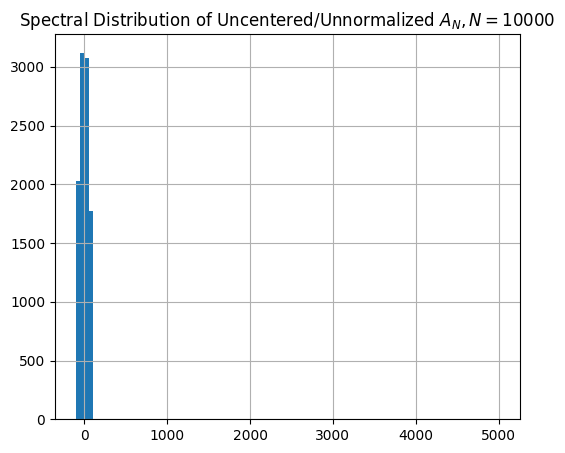

In [167]:
fig, ax = plt.subplots(figsize=(6, 5))

ax.hist(eigen_An,
        bins=100)
ax.grid()

ax.set_title("Spectral Distribution of Uncentered/Unnormalized $A_N, N=%s$" % n)

#### Normalizing $A_N$ by $\sqrt{np(1-p)}$ and plotting its ESD

Text(0.5, 1.0, 'Spectral Distribution of Centered, Normalized $A_N, N=10000$')

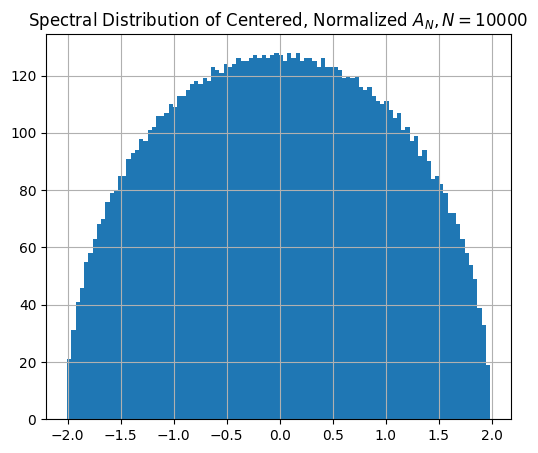

In [168]:
centered_An = An - p
normed_centered_An = centered_An * 1/np.sqrt(n * p * (1 - p))
eigen_normed_An = np.linalg.eigvalsh(normed_centered_An)

fig, ax = plt.subplots(figsize=(6, 5))

ax.hist(eigen_normed_An,
        bins=100)
ax.grid()

ax.set_title("Spectral Distribution of Centered, Normalized $A_N, N=%s$" % n)

### Plotting the ESD of $\Delta_N$ and $L_N$

Text(0.5, 0.98, 'Unnormalized/Uncentered Spectral Distributions of Dense $\\Delta_N$ and $L_N, N=10000$, Fixed $p$')

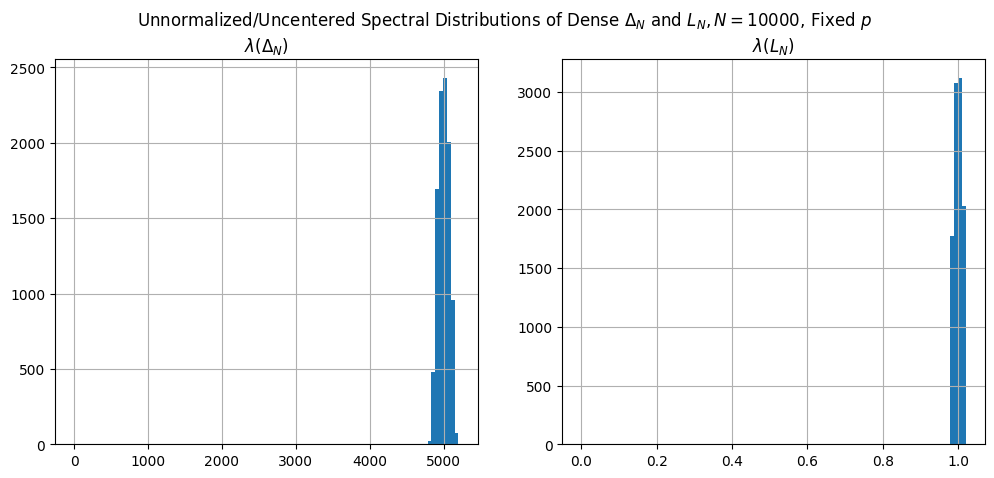

In [169]:
eigen_Ln = np.linalg.eigvalsh(Ln)
eigen_Laplacian_n = np.linalg.eigvalsh(laplacian)

fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

axs[0].hist(eigen_Laplacian_n,
            bins=100)
axs[0].grid()
axs[0].set_title("$\lambda(\Delta_N$)")

axs[1].hist(eigen_Ln,
            bins=100)
axs[1].grid()
axs[1].set_title("$\lambda(L_N)$")

fig.suptitle("Unnormalized/Uncentered Spectral Distributions of Dense $\Delta_N$ and $L_N, N=%s$, Fixed $p$" % n)

### Plotting the ESD of the Centered $\Delta_N$ and $L_N$

Text(0.5, 0.98, 'Normalized/Centered Spectral Distributions of Dense $\\Delta_N$ and $L_N, N=10000$, Fixed $p$')

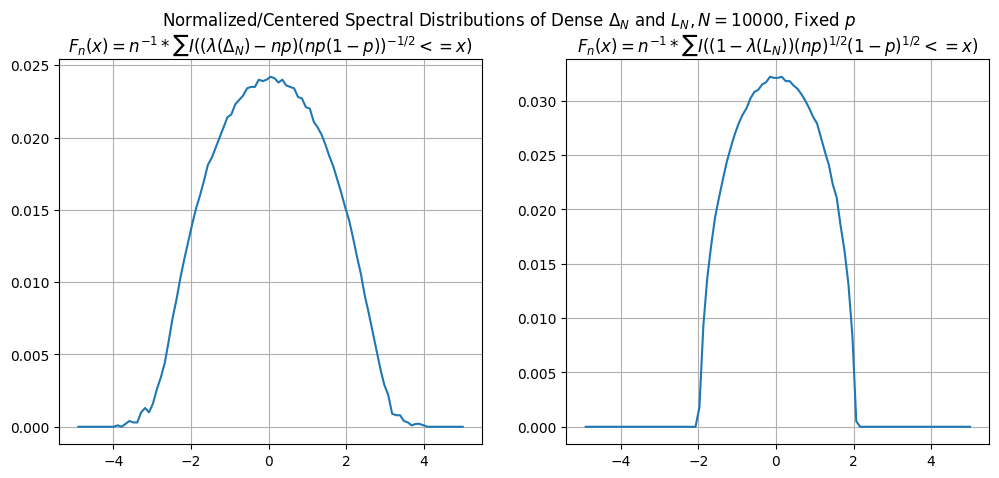

In [170]:
x_range = np.linspace(-5, 5, 100)

centered_laplacian = laplacian - n * p
normed_centered_laplacian = centered_laplacian * 1/np.sqrt(n * p * (1 - p))
normed_centered_eigen_Laplacian_n = (np.linalg.eigvalsh(laplacian) - (n) * p)/(np.sqrt(n * p * (1 - p)))
Fn_Laplacian = [np.sum(normed_centered_eigen_Laplacian_n <= x)/n for x in x_range]

normed_centered_eigen_Ln = (1 - eigen_Ln) * np.sqrt((n * p)/(1 - p))
Fn_Normed_Laplacian = [np.sum(normed_centered_eigen_Ln <= x)/n for x in x_range]

fig, axs = plt.subplots(figsize=(12, 5), ncols=2)

axs[0].plot(x_range[1:], np.diff(Fn_Laplacian))
axs[0].grid()
axs[0].set_title("$F_n(x) = n^{-1} * \sum I((\lambda(\Delta_N) - np)(np(1-p))^{-1/2} <= x)$")

axs[1].plot(x_range[1:],
            np.diff(Fn_Normed_Laplacian))
axs[1].grid()
axs[1].set_title("$F_n(x) = n^{-1} * \sum I((1-\lambda(L_N))(np)^{1/2}(1-p)^{1/2} <= x)$")

fig.suptitle("Normalized/Centered Spectral Distributions of Dense $\Delta_N$ and $L_N, N=%s$, Fixed $p$" % n)